In [240]:
import SGAFilter
import graph_stats
import heuristics
import seaborn
import numpy as np
import math
import cPickle
from load_filter_graph import give_time
from common import *
from compare_assemblies import *
import matplotlib_venn

In [221]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
conds = {'6683_16-06-2015':1, '6685_04-06-2015':0, '6685_16-06-2015':1, 
         '6690_04-06-2015':0, '6690_16-06-2015':1, '6695_04-06-2015':0, 
         '6695_16-06-2015':1, '6704_04-06-2015':0, '6704_16-06-2015':1}
test_name = 'sga_test_full_notrim_paired_reversed'
folder = "/mnt/chr7/data/julia/"+test_name
suf = ".preprocessed_qf5.ec.filter.pass.rmdup"
filename = folder+"/merged"+suf+"_31.asqg"

In [4]:
#### load graph
#stats = cPickle.load(open('stats_'+test_name+suf+'_sga.pickle', 'rb'))
sg = cPickle.load(open('simplified_'+test_name+suf+'_sga.pickle', 'rb'))

# Analyze 1 component

In [6]:
sg1 = SGAFilter.get_random_components(sg, 1)

In [37]:
cPickle.dump(sg1, open('1randomcomponent_'+test_name+suf+'_sga.pickle', 'wb'))

In [7]:
graph_stats.short_summary(sg1)

Number of nodes 362
Number of edges 368
Number of reads 2534


## Longest paths

In [40]:
MIN_FC = 2

In [92]:
outname = "simplified_1random"
# Heuristic 1: take longest
print "Start heuristic 1: longest", give_time()
longest1 = heuristics.take_longest(sg1)
print "Found %d paths" % len(longest1), give_time()
# filter by FC
longest_filter1 = SGAFilter.filter_paths(sg1, longest1, min_fc = MIN_FC)
print "Found %d paths with foldchange >= %f" % (len(longest_filter), MIN_FC)

Start heuristic 1: longest Wed Aug 22 15:07:21 2018
Found 13 paths Wed Aug 22 15:07:21 2018
705 127 5.55118110236
259 5 51.8
588 282 2.08510638298
0 7 1.42857142857e-07
27 88 0.306818181818
85 8 10.625
50 3 16.6666666667
32 2 16.0
113 0 113000000.0
134 4 33.5
0 1 1e-06
0 10 1e-07
0 4 2.5e-07
Leave 13 sequences with 2534 counts
Found 13 paths with foldchange >= 2.000000
Finished heuristic 1: longest Wed Aug 22 15:07:21 2018


In [135]:
sg1.save_path_sequences(longest_filter1, outname+'_sg1_longest.fa')
print "Finished heuristic 1: longest", give_time()

Saving 13 sequences
no. sequences loaded: 924
no. edges loaded: 911
Saved 13 sequences with 2534 counts of total length 4209
Finished heuristic 1: longest Thu Aug 23 14:25:00 2018


## Longest unfil fc>FC

In [69]:
# Heuristic 2: take longest until foldchange
print "Start heuristic 2: longest until FC", give_time()
longest_fc1 = heuristics.take_longest_minfc(sg1, MIN_FC)
print "Found %d paths with foldchange >= %f" % (len(longest_fc1), MIN_FC), give_time()

Start heuristic 2: longest until FC Wed Aug 22 13:28:56 2018
Found 13 paths with foldchange >= 2.000000 Wed Aug 22 13:28:56 2018


In [120]:
sg1.save_path_sequences(longest_fc1, outname+'_sg1_longestfc.fa')
print "Finished heuristic 2: longest until FC", give_time()

Saving 13 sequences
no. sequences loaded: 924
no. edges loaded: 911
Saved 13 sequences with 2534 counts of total length 4168
Finished heuristic 2: longest until FC Thu Aug 23 13:36:51 2018


## Best fc

In [68]:
# Heuristic 3: take best foldchange until > FC
print "Start heuristic 3: take best foldchange until > FC", give_time()
best_fc1 = heuristics.take_best_fc(sg1, MIN_FC)
print "Found %d paths with foldchange >= %f" % (len(best_fc1), MIN_FC), give_time()

Start heuristic 3: take best foldchange until > FC Wed Aug 22 13:28:45 2018
Found 13 paths with foldchange >= 2.000000 Wed Aug 22 13:28:45 2018


In [136]:
sg1.save_path_sequences(best_fc1, outname+'_sg1_bestfc.fa')
print "Finished heuristic 3: take best foldchange until > FC", give_time()

Saving 13 sequences
no. sequences loaded: 924
no. edges loaded: 911
Saved 13 sequences with 2534 counts of total length 4159
Finished heuristic 3: take best foldchange until > FC Thu Aug 23 14:41:37 2018


## Compare edges used in assembly

In [139]:
# test identical sets
compare_used_edges(longest_fc1, outname+'_sg1_longestfc.fa');

jaccard 911 911
#edges1=911	#edges2=911	Jaccard index=1.000000


In [130]:
compare_used_edges(longest_filter1, longest_fc1)
compare_counts(sg1, longest_filter1, longest_fc1);

jaccard 904 918
#edges1=911	#edges2=911	Jaccard index=0.984749
Sum1 =  2534 Sum2 =  2534
Foldchanges: [5.551181102362205, 51.8, 2.0851063829787235, 1.4285714285714285e-07, 0.3068181818181818, 10.625, 16.666666666666668, 16.0, 113000000.0, 33.5, 1e-06, 1e-07, 2.5e-07, 2.4390243902439023e-08, 4.474626865671642, 2e-08, 122000000.0, 1.4285714285714285e-07, 0.3068181818181818, 21.8, 10.625, 16.0, 113000000.0, 1e-06, 6000000.0, 2.5e-07]


In [133]:
compare_used_edges(longest_filter1, best_fc1)
compare_counts(sg1, longest_filter1, best_fc1);

jaccard 899 923
#edges1=911	#edges2=911	Jaccard index=0.973998
Sum1 =  2534 Sum2 =  2534
Foldchanges: [5.551181102362205, 51.8, 2.0851063829787235, 1.4285714285714285e-07, 0.3068181818181818, 10.625, 16.666666666666668, 16.0, 113000000.0, 33.5, 1e-06, 1e-07, 2.5e-07, 2.876543209876543, 8.3671875, 7.833333333333333, 2.4390243902439023e-08, 2e-08, 16.0, 1.1111111111111111e-07, 1e-07, 1e-07, 6000000.0, 1000000.0, 21.8, 0.29545454545454547]


In [134]:
compare_used_edges(longest_fc1, best_fc1)
compare_counts(sg1, longest_fc1, best_fc1);

jaccard 902 920
#edges1=911	#edges2=911	Jaccard index=0.980435
Sum1 =  2534 Sum2 =  2534
Foldchanges: [2.4390243902439023e-08, 4.474626865671642, 2e-08, 122000000.0, 1.4285714285714285e-07, 0.3068181818181818, 21.8, 10.625, 16.0, 113000000.0, 1e-06, 6000000.0, 2.5e-07, 2.876543209876543, 8.3671875, 7.833333333333333, 2.4390243902439023e-08, 2e-08, 16.0, 1.1111111111111111e-07, 1e-07, 1e-07, 6000000.0, 1000000.0, 21.8, 0.29545454545454547]


# Analyze WHOLE GRAPH

In [140]:
graph_stats.short_summary(sg)

Number of nodes 5993630
Number of edges 8469080
Number of reads 113859152


## Longest paths

In [141]:
MIN_FC = 2

In [146]:
outname = "simplified"
# Heuristic 1: take longest
print "Start heuristic 1: longest", give_time()
#longest = heuristics.take_longest(sg)
print "Found %d paths" % len(longest), give_time()
# filter by FC
longest_filter = SGAFilter.filter_paths(sg, longest, min_fc = MIN_FC)
print "Found %d paths with foldchange >= %f" % (len(longest_filter), MIN_FC)

 Start heuristic 1: longest Thu Aug 23 15:33:10 2018
Found 722089 paths Thu Aug 23 15:33:10 2018
Leave 596260 sequences with 72770883 counts
Found 596260 paths with foldchange >= 2.000000


In [165]:
longest_filter_seqs = sg.save_path_sequences(longest_filter, outname+'_sg_longest.fa')
print "Finished heuristic 1: longest", give_time()

Saving 596260 sequences
no. sequences loaded: 13908344
no. edges loaded: 13313101
Saved 596260 sequences with 72770883 counts of total length 128063940
Finished heuristic 1: longest Thu Sep  6 16:24:17 2018


## Longest unfil fc>FC

In [147]:
# Heuristic 2: take longest until foldchange
print "Start heuristic 2: longest until FC", give_time()
longest_fc = heuristics.take_longest_minfc(sg, MIN_FC)
print "Found %d paths with foldchange >= %f" % (len(longest_fc), MIN_FC), give_time()

Start heuristic 2: longest until FC Thu Aug 23 15:39:59 2018
Found 1080089 paths with foldchange >= 2.000000 Thu Aug 23 15:42:53 2018


In [166]:
longest_fc_seqs = sg.save_path_sequences(longest_fc, outname+'_sg_longestfc.fa')
print "Finished heuristic 2: longest until FC", give_time()

Saving 1080089 sequences
no. sequences loaded: 16718856
no. edges loaded: 15639817
Saved 1080089 sequences with 82340781 counts of total length 188580298
Finished heuristic 2: longest until FC Thu Sep  6 16:44:42 2018


## Best fc

In [153]:
# Heuristic 3: take best foldchange until > FC
print "Start heuristic 3: take best foldchange until > FC", give_time()
best_fc = heuristics.take_best_fc(sg, MIN_FC)
print "Found %d paths with foldchange >= %f" % (len(best_fc), MIN_FC), give_time()

 Start heuristic 3: take best foldchange until > FC Fri Aug 24 19:13:03 2018
Found 899823 paths with foldchange >= 2.000000 Fri Aug 24 19:14:58 2018


In [167]:
best_fc_seqs = sg.save_path_sequences(best_fc, outname+'_sg_bestfc.fa')
print "Finished heuristic 3: take best foldchange until > FC", give_time()

Saving 899823 sequences
no. sequences loaded: 16820425
no. edges loaded: 15921715
Saved 899823 sequences with 83217162 counts of total length 170634689
Finished heuristic 3: take best foldchange until > FC Thu Sep  6 17:05:44 2018


## Compare

In [180]:
compare_used_edges(longest_filter, longest_fc)

Set1\set2= 379555
Set1 n Set2= 12933546
Set2\set1= 2706271
#edges1=13313101	#edges2=15639817	Jaccard index=0.807369


In [181]:
compare_used_edges(longest_filter, best_fc)

Set1\set2= 678600
Set1 n Set2= 12634501
Set2\set1= 3287214
#edges1=13313101	#edges2=15921715	Jaccard index=0.761100


In [182]:
compare_used_edges(longest_fc, best_fc)

Set1\set2= 961010
Set1 n Set2= 14678807
Set2\set1= 1242908
#edges1=15639817	#edges2=15921715	Jaccard index=0.869457


In [185]:
stats(sg, longest_filter, longest_filter_seqs)
stats(sg, longest_fc, longest_fc_seqs)
stats(sg, best_fc, best_fc_seqs)

No. paths: 596260 Length:  128063940 Counts: 72770883
No. paths: 1080089 Length:  188580298 Counts: 82340781
No. paths: 899823 Length:  170634689 Counts: 83217162


## Filter results by length of contig
min_len = 200

In [168]:
MIN_LEN = 200

In [171]:
longest_filter_200 = filter_lengths(longest_filter, longest_filter_seqs, MIN_LEN)
longest_fc_200 = filter_lengths(longest_fc, longest_fc_seqs, MIN_LEN)
best_fc_200 = filter_lengths(best_fc, best_fc_seqs, MIN_LEN)


In [176]:
stats(sg, longest_filter_200[0], longest_filter_200[1])
stats(sg, longest_fc_200[0], longest_fc_200[1])
stats(sg, best_fc_200[0], best_fc_200[1])

No. paths: 137071 Length:  73364149 Counts: 41397031
No. paths: 162513 Length:  85257069 Counts: 45698868
No. paths: 169891 Length:  86385438 Counts: 47288414


#### This version included edges from previously joined nodes.

In [179]:
compare_used_edges(longest_filter_200[0], longest_fc_200[0])
compare_used_edges(longest_filter_200[0], best_fc_200[0])
compare_used_edges(longest_fc_200[0], best_fc_200[0])

Set1\set2= 503913
Set1 n Set2= 10672138
Set2\set1= 2118083
#edges1=11176051	#edges2=12790221	Jaccard index=0.802770
Set1\set2= 1338285
Set1 n Set2= 9837766
Set2\set1= 3278648
#edges1=11176051	#edges2=13116414	Jaccard index=0.680593
Set1\set2= 1749288
Set1 n Set2= 11040933
Set2\set1= 2075481
#edges1=12790221	#edges2=13116414	Jaccard index=0.742712


#### This version uses only edges created in paths creation.

In [241]:
compare_used_edges_new(longest_filter_200[0], longest_fc_200[0])
compare_used_edges_new(longest_filter_200[0], best_fc_200[0])
compare_used_edges_new(longest_fc_200[0], best_fc_200[0])

Set1\set2= 314953
Set1 n Set2= 1835279
Set2\set1= 727019
#edges1=2150232	#edges2=2562298	Jaccard index=0.637858
Set1\set2= 806496
Set1 n Set2= 1343736
Set2\set1= 1651953
#edges1=2150232	#edges2=2995689	Jaccard index=0.353412
Set1\set2= 1050747
Set1 n Set2= 1511551
Set2\set1= 1484138
#edges1=2562298	#edges2=2995689	Jaccard index=0.373551


## Identical contigs

In [188]:
compare_identical(longest_filter_200[0], longest_fc_200[0])
compare_identical(longest_filter_200[0], best_fc_200[0])
compare_identical(longest_fc_200[0], best_fc_200[0])

Identical: 96472 S1 percent: 0.703810434009 S2 percent: 0.593626356045
Identical: 51525 S1 percent: 0.37590008098 S2 percent: 0.303282693021
Identical: 52588 S1 percent: 0.323592574133 S2 percent: 0.309539646008


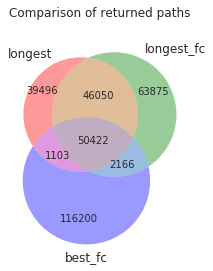

In [233]:
from matplotlib_venn import venn3, venn3_circles

identical_venn([longest_filter_200[1], longest_fc_200[1], best_fc_200[1]], ["longest", "longest_fc", "best_fc"])

## Pairs of connections  in paths? 

In [245]:
compare_pairs_of_edges(longest_filter_200[0], longest_fc_200[0])
compare_pairs_of_edges(longest_filter_200[0], best_fc_200[0])
compare_pairs_of_edges(longest_fc_200[0], best_fc_200[0])

Set1\set2= 330104
Set1 n Set2= 1727873
Set2\set1= 716962
#pairs1=2057977	#pairs2=2444835	Jaccard index=0.622671
Set1\set2= 845472
Set1 n Set2= 1212505
Set2\set1= 1659445
#pairs1=2057977	#pairs2=2871950	Jaccard index=0.326168
Set1\set2= 1098771
Set1 n Set2= 1346064
Set2\set1= 1525886
#pairs1=2444835	#pairs2=2871950	Jaccard index=0.338997


# Compare with SGA

In [252]:
sg.write_to_asqg("my_simplified_merged"+suf+"_31_v6.asqg")

no. sequences loaded: 19309132
no. edges loaded: 13315502


In [253]:
%%bash -s "$suf"
sga assemble -o my_simplified_merged$1_31_assemble my_simplified_merged$1_31_v6.asqg
#gunzip -c my_simplified_merged$1_31_assemble-graph.asqg.gz > my_simplified_merged$1_31_assemble-graph.asqg

Deleted edges for 0 super repetitive vertices


Warning vertex K00114:251:H52JYBBXX:8:1209:26159:27830:6695_04-06-2015/2 is color  expected  
sga: SGVisitors.cpp:345: void SGDuplicateVisitor::previsit(StringGraph*): Assertion `pGraph->checkColors(GC_WHITE)' failed.
bash: line 1: 14871 Aborted                 (core dumped) sga assemble -o my_simplified_merged$1_31_assemble my_simplified_merged$1_31_v6.asqg
